/tmp/ipykernel_529239/1309773508.py:82: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y=mii_expression_data, color='#ffe119', vertical=False, ax=ax2)
/tmp/ipykernel_529239/1309773508.py:93: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y=c2_expression_data, color='#3cb44b', vertical=False, ax=ax3)
/tmp/ipykernel_529239/1309773508.py:104: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y=c4_expression_data, color='#e6194b', vertical=False, ax=ax4)
/tmp/ipykernel_529239/1309773508.py:116: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_font

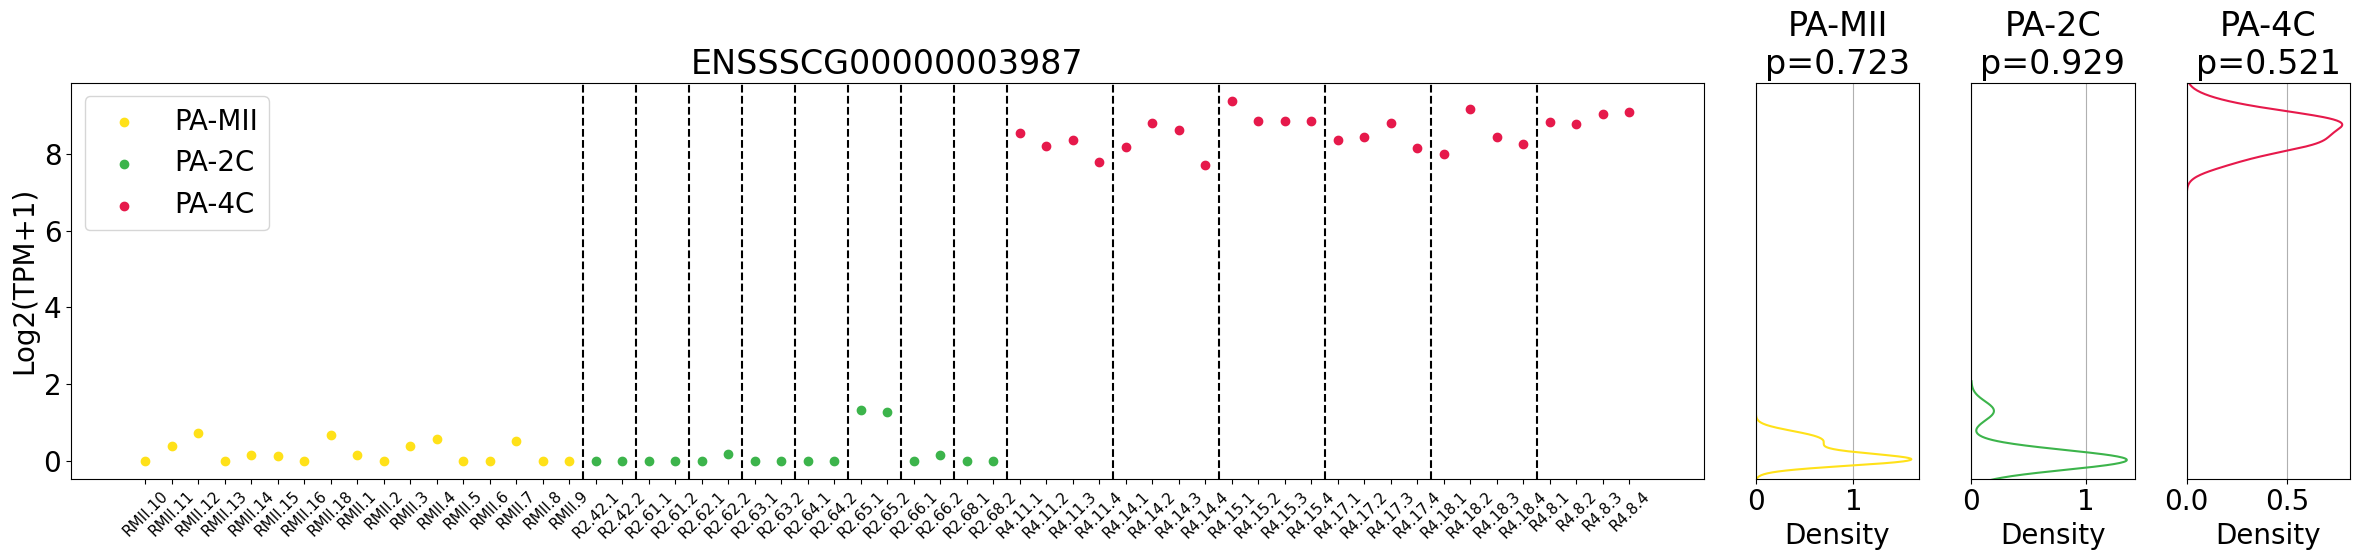

In [2]:
#PA 完整胚胎表达量可视化
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import diptest
import numpy as np  # Import NumPy

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 打开文件并读取内容
with open('PA_full_log2TPM_genename.txt', 'r') as file:
    lines = file.readlines()

# 解析第一行，提取细胞名称
cell_names = lines[0].strip().split('\t')[1:]

# 初始化一个空字典来存储数据
gene_data = {}

# 解析文件内容，存储基因数据
for line in lines[1:]:
    parts = line.strip().split('\t')
    gene_id = parts[0]
    expression_data = list(map(float, parts[1:]))
    gene_data[gene_id] = expression_data

# 指定要绘制散点图的基因名
gene_id = "ENSSSCG00000003987"

# 获取指定基因的表达数据
expression_data = gene_data[gene_id]

# 生成 x 轴数据，这里是细胞名称
x_values = cell_names

# 选取 MII 细胞的索引
mii_indices = [i for i, cell_name in enumerate(cell_names) if cell_name.startswith('RMII')]
c2_indices = [i for i, cell_name in enumerate(cell_names) if cell_name.startswith('R2')]
c4_indices = [i for i, cell_name in enumerate(cell_names) if cell_name.startswith('R4')]
# 选取 MII 细胞的表达数据
mii_expression_data = [expression_data[i] for i in mii_indices]
c2_expression_data = [expression_data[i] for i in c2_indices]
c4_expression_data = [expression_data[i] for i in c4_indices]

# 创建一个带有两个子图的图形
fig = plt.figure(figsize=(24, 6))  # 增大图形宽度以增大每列数据的间距
gs = gridspec.GridSpec(1, 4, width_ratios=[10, 1, 1, 1])  # 调整第一个子图的宽度

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

# 绘制 MII 细胞的散点图
ax1.scatter([x_values[i] for i in mii_indices], mii_expression_data, color='#ffe119', label='PA-MII')
ax1.scatter([x_values[i] for i in c2_indices], c2_expression_data, color='#3cb44b', label='PA-2C')
ax1.scatter([x_values[i] for i in c4_indices], c4_expression_data, color='#e6194b', label='PA-4C')
ax1.set_title(gene_id)
#ax1.set_title('CXCL16')
ax1.set_xlabel('')  
ax1.set_ylabel('Log2(TPM+1)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

ax1.axvline(x=16.5, color='black', linestyle='--')
ax1.axvline(x=18.5, color='black', linestyle='--')
ax1.axvline(x=20.5, color='black', linestyle='--')
ax1.axvline(x=22.5, color='black', linestyle='--')
ax1.axvline(x=24.5, color='black', linestyle='--')
ax1.axvline(x=26.5, color='black', linestyle='--')
ax1.axvline(x=28.5, color='black', linestyle='--')
ax1.axvline(x=30.5, color='black', linestyle='--')
ax1.axvline(x=32.5, color='black', linestyle='--')
ax1.axvline(x=36.5, color='black', linestyle='--')
ax1.axvline(x=40.5, color='black', linestyle='--')
ax1.axvline(x=44.5, color='black', linestyle='--')
ax1.axvline(x=48.5, color='black', linestyle='--')
ax1.axvline(x=52.5, color='black', linestyle='--')

# 绘制 MII 细胞的密度曲线分布图
sns.kdeplot(y=mii_expression_data, color='#ffe119', vertical=False, ax=ax2)
mii_expression_data = np.array(mii_expression_data)
p_value_mii = diptest.diptest(mii_expression_data)[1]
ax2.set_title(f'PA-MII\np={p_value_mii:.3f}')
ax2.set_xlabel('Density')
ax2.set_ylabel('')
ax2.set_ylim(ax1.get_ylim())  # 设置纵坐标轴范围与第一个子图一致
ax2.grid(True)
ax2.set_yticks([])  # 隐藏 y 轴刻度和标签

# 绘制 2C 细胞的密度曲线分布图
sns.kdeplot(y=c2_expression_data, color='#3cb44b', vertical=False, ax=ax3)
c2_expression_data = np.array(c2_expression_data)
p_value_c2 = diptest.diptest(c2_expression_data)[1]
ax3.set_title(f'PA-2C\np={p_value_c2:.3f}')
ax3.set_xlabel('Density')
ax3.set_ylabel('')
ax3.set_ylim(ax1.get_ylim())  # 设置纵坐标轴范围与第一个子图一致
ax3.grid(True)
ax3.set_yticks([])  # 隐藏 y 轴刻度和标签

# 绘制 4C 细胞的密度曲线分布图
sns.kdeplot(y=c4_expression_data, color='#e6194b', vertical=False, ax=ax4)
c4_expression_data = np.array(c4_expression_data)
p_value_c4 = diptest.diptest(c4_expression_data)[1]
ax4.set_title(f'PA-4C\np={p_value_c4:.3f}')
ax4.set_xlabel('Density')
ax4.set_ylabel('')
ax4.set_ylim(ax1.get_ylim())  # 设置纵坐标轴范围与第一个子图一致
ax4.grid(True)
ax4.set_yticks([])  # 隐藏 y 轴刻度和标签

# 单独设置子图1的x轴标签字体大小为12
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    
plt.tight_layout()
plt.show()


/tmp/ipykernel_2775208/158739584.py:118: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(11)


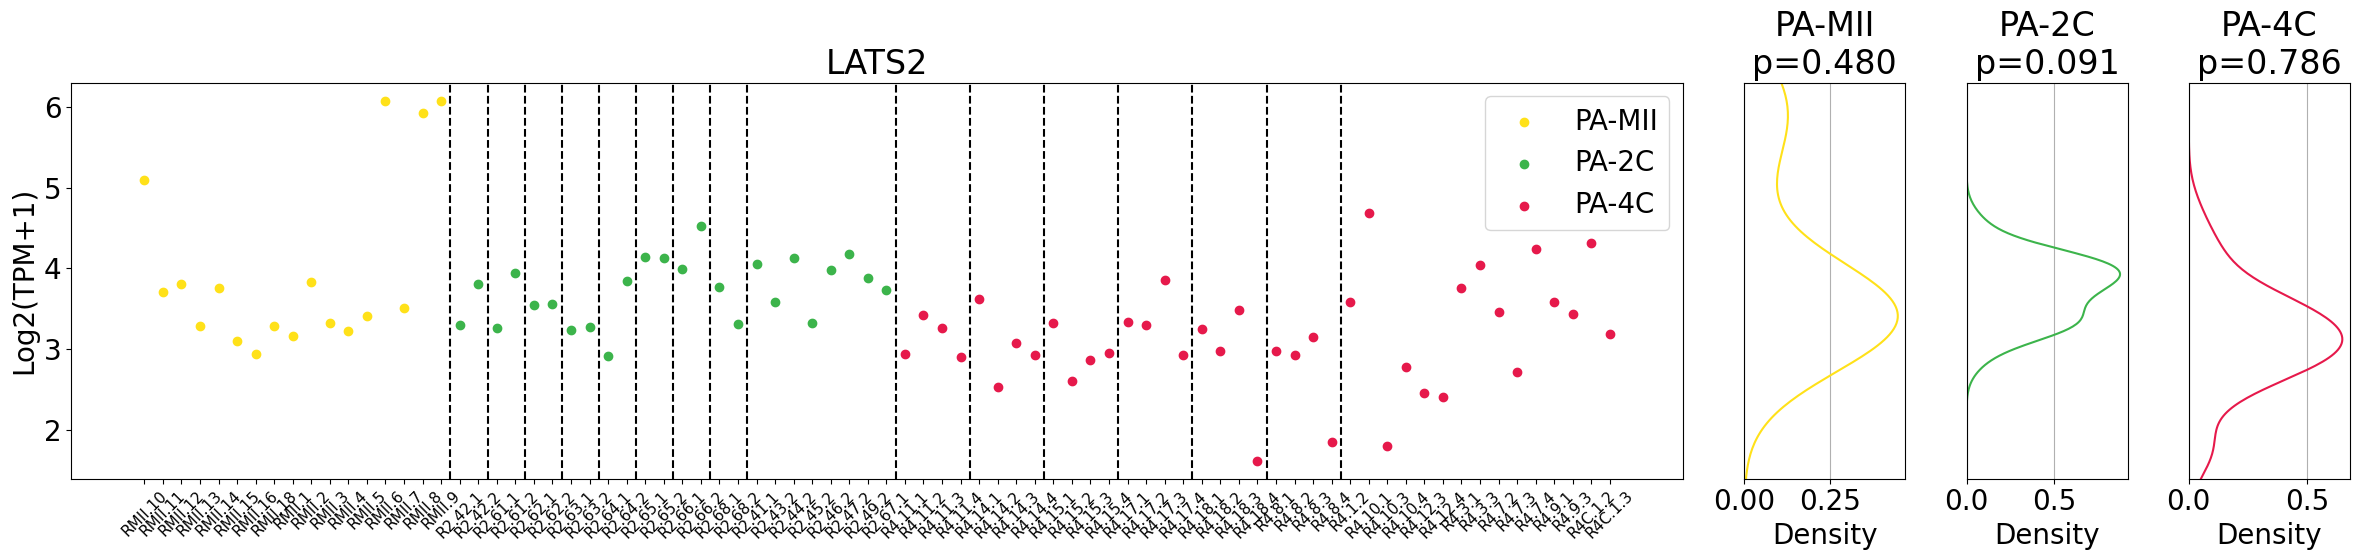

In [73]:
#PA 所有胚胎表达量可视化
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import diptest
import numpy as np  # Import NumPy

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 打开文件并读取内容
with open('PA_all_sort_log2TPM_genename.txt', 'r') as file:
    lines = file.readlines()

# 解析第一行，提取细胞名称
cell_names = lines[0].strip().split('\t')[1:]

# 初始化一个空字典来存储数据
gene_data = {}

# 解析文件内容，存储基因数据
for line in lines[1:]:
    parts = line.strip().split('\t')
    gene_id = parts[0]
    expression_data = list(map(float, parts[1:]))
    gene_data[gene_id] = expression_data

# 指定要绘制散点图的基因名
gene_id = "LATS2"

# 获取指定基因的表达数据
expression_data = gene_data[gene_id]

# 生成 x 轴数据，这里是细胞名称
x_values = cell_names

# 选取 MII 细胞的索引
mii_indices = [i for i, cell_name in enumerate(cell_names) if cell_name.startswith('RMII')]
c2_indices = [i for i, cell_name in enumerate(cell_names) if cell_name.startswith('R2')]
c4_indices = [i for i, cell_name in enumerate(cell_names) if cell_name.startswith('R4')]
# 选取 MII 细胞的表达数据
mii_expression_data = [expression_data[i] for i in mii_indices]
c2_expression_data = [expression_data[i] for i in c2_indices]
c4_expression_data = [expression_data[i] for i in c4_indices]

# 创建一个带有两个子图的图形
fig = plt.figure(figsize=(24, 6))  # 增大图形宽度以增大每列数据的间距
gs = gridspec.GridSpec(1, 4, width_ratios=[10, 1, 1, 1])  # 调整第一个子图的宽度

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

# 绘制 MII 细胞的散点图
ax1.scatter([x_values[i] for i in mii_indices], mii_expression_data, color='#ffe119', label='PA-MII')
ax1.scatter([x_values[i] for i in c2_indices], c2_expression_data, color='#3cb44b', label='PA-2C')
ax1.scatter([x_values[i] for i in c4_indices], c4_expression_data, color='#e6194b', label='PA-4C')
ax1.set_title(gene_id)
ax1.set_xlabel('')  
ax1.set_ylabel('Log2(TPM+1)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

ax1.axvline(x=16.5, color='black', linestyle='--')
ax1.axvline(x=18.5, color='black', linestyle='--')
ax1.axvline(x=20.5, color='black', linestyle='--')
ax1.axvline(x=22.5, color='black', linestyle='--')
ax1.axvline(x=24.5, color='black', linestyle='--')
ax1.axvline(x=26.5, color='black', linestyle='--')
ax1.axvline(x=28.5, color='black', linestyle='--')
ax1.axvline(x=30.5, color='black', linestyle='--')
ax1.axvline(x=32.5, color='black', linestyle='--')


ax1.axvline(x=40.5, color='black', linestyle='--')
ax1.axvline(x=44.5, color='black', linestyle='--')
ax1.axvline(x=48.5, color='black', linestyle='--')
ax1.axvline(x=52.5, color='black', linestyle='--')
ax1.axvline(x=56.5, color='black', linestyle='--')
ax1.axvline(x=60.5, color='black', linestyle='--')
ax1.axvline(x=64.5, color='black', linestyle='--')
# 绘制 MII 细胞的密度曲线分布图
sns.kdeplot(y=mii_expression_data, color='#ffe119', vertical=False, ax=ax2)
mii_expression_data = np.array(mii_expression_data)
p_value_mii = diptest.diptest(mii_expression_data)[1]
ax2.set_title(f'PA-MII\np={p_value_mii:.3f}')
ax2.set_xlabel('Density')
ax2.set_ylabel('')
ax2.set_ylim(ax1.get_ylim())  # 设置纵坐标轴范围与第一个子图一致
ax2.grid(True)
ax2.set_yticks([])  # 隐藏 y 轴刻度和标签

# 绘制 2C 细胞的密度曲线分布图
sns.kdeplot(y=c2_expression_data, color='#3cb44b', vertical=False, ax=ax3)
c2_expression_data = np.array(c2_expression_data)
p_value_c2 = diptest.diptest(c2_expression_data)[1]
ax3.set_title(f'PA-2C\np={p_value_c2:.3f}')
ax3.set_xlabel('Density')
ax3.set_ylabel('')
ax3.set_ylim(ax1.get_ylim())  # 设置纵坐标轴范围与第一个子图一致
ax3.grid(True)
ax3.set_yticks([])  # 隐藏 y 轴刻度和标签

# 绘制 4C 细胞的密度曲线分布图
sns.kdeplot(y=c4_expression_data, color='#e6194b', vertical=False, ax=ax4)
c4_expression_data = np.array(c4_expression_data)
p_value_c4 = diptest.diptest(c4_expression_data)[1]
ax4.set_title(f'PA-4C\np={p_value_c4:.3f}')
ax4.set_xlabel('Density')
ax4.set_ylabel('')
ax4.set_ylim(ax1.get_ylim())  # 设置纵坐标轴范围与第一个子图一致
ax4.grid(True)
ax4.set_yticks([])  # 隐藏 y 轴刻度和标签

# 单独设置子图1的x轴标签字体大小为12
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    
plt.tight_layout()
plt.show()


/tmp/ipykernel_529239/3343271386.py:87: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(11)


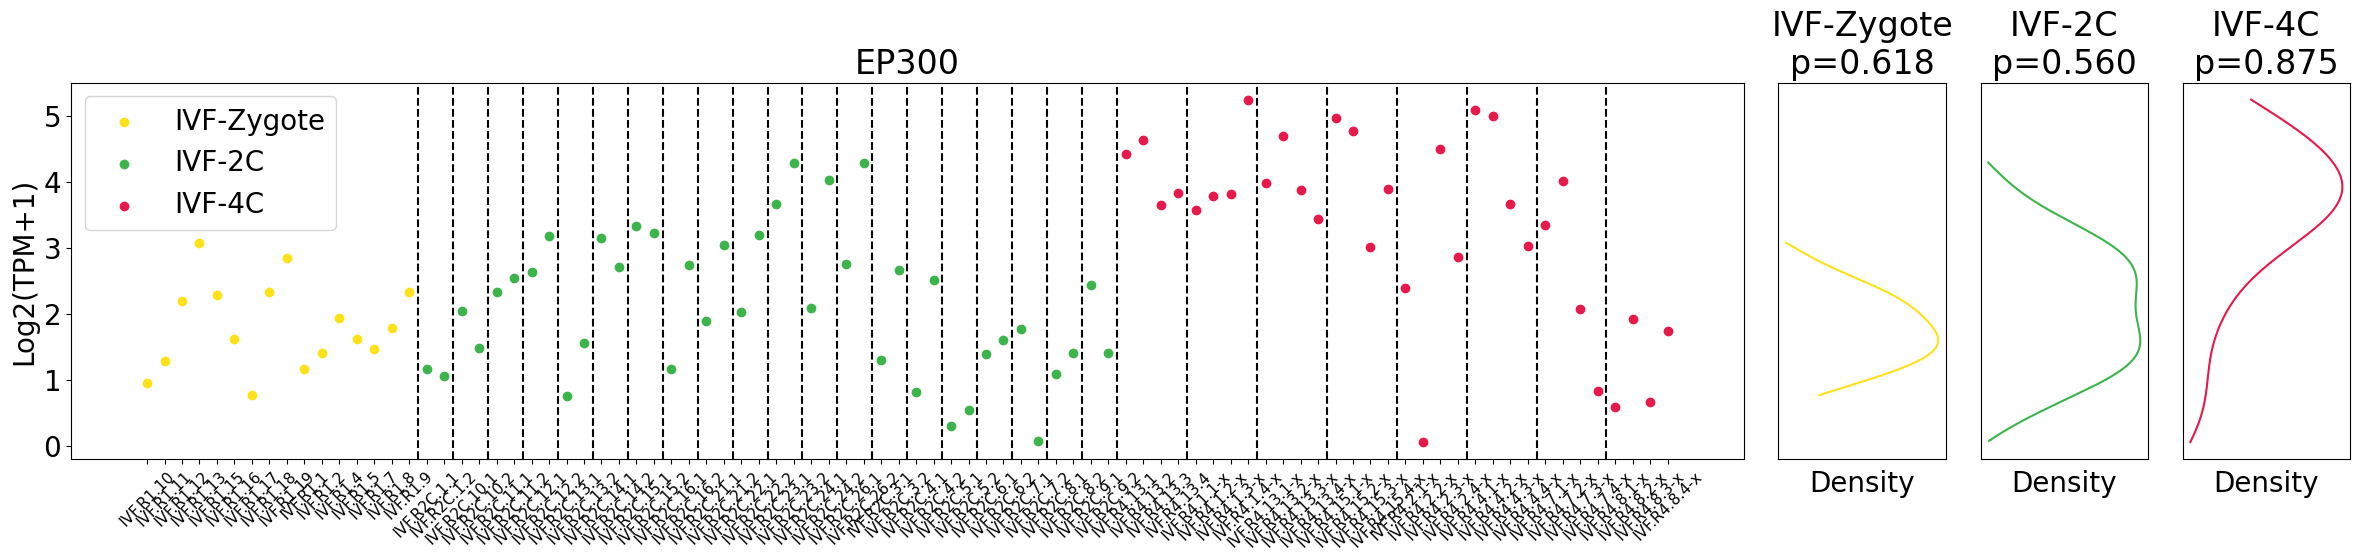

In [97]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import diptest
from scipy.stats import gaussian_kde
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 读取表达矩阵文件
with open('IVF_full_log2TPM_genename.txt', 'r') as file:
    lines = file.readlines()

# 获取细胞名
cell_names = lines[0].strip().split('\t')[1:]

# 存储基因表达数据
gene_data = {}
for line in lines[1:]:
    parts = line.strip().split('\t')
    gene_id = parts[0]
    expression_data = list(map(float, parts[1:]))
    gene_data[gene_id] = expression_data

# 选择目标基因
gene_id = "EP300"
expression_data = gene_data[gene_id]

# 提取各阶段索引和数据
mii_indices = [i for i, name in enumerate(cell_names) if name.startswith('IVF.R1')]
c2_indices  = [i for i, name in enumerate(cell_names) if name.startswith('IVF.R2C')]
c4_indices  = [i for i, name in enumerate(cell_names) if name.startswith('IVF.R4')]

mii_expression = np.array([expression_data[i] for i in mii_indices])
c2_expression  = np.array([expression_data[i] for i in c2_indices])
c4_expression  = np.array([expression_data[i] for i in c4_indices])

# 创建图形和子图
fig = plt.figure(figsize=(24, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[10, 1, 1, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

# 散点图
ax1.scatter([cell_names[i] for i in mii_indices], mii_expression, color='#ffe119', label='IVF-Zygote')
ax1.scatter([cell_names[i] for i in c2_indices], c2_expression, color='#3cb44b', label='IVF-2C')
ax1.scatter([cell_names[i] for i in c4_indices], c4_expression, color='#e6194b', label='IVF-4C')
ax1.set_title(gene_id)
ax1.set_ylabel('Log2(TPM+1)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# 添加虚线
for x in [15.5,17.5,19.5,21.5,23.5,25.5,27.5,29.5,31.5,33.5,35.5,
          37.5,39.5,41.5,43.5,45.5,47.5,49.5,51.5,53.5,55.5,
          59.5,63.5,67.5,71.5,75.5,79.5,83.5]:
    ax1.axvline(x=x, color='black', linestyle='--')

# 密度图函数
def plot_density(ax, data, color, label):
    kde = gaussian_kde(data)
    y_vals = np.linspace(min(data), max(data), 500)
    x_vals = kde(y_vals)
    ax.plot(x_vals, y_vals, color=color)
    ax.set_ylim(ax1.get_ylim())
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Density')
    ax.grid(True)
    p = diptest.diptest(data)[1]
    ax.set_title(f'{label}\np={p:.3f}')

# 绘制密度图
plot_density(ax2, mii_expression, '#ffe119', 'IVF-Zygote')
plot_density(ax3, c2_expression, '#3cb44b', 'IVF-2C')
plot_density(ax4, c4_expression, '#e6194b', 'IVF-4C')

# 调整字体
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)

plt.tight_layout()
# 保存图像为 PDF
#plt.savefig('IVF_GATA6_expression.svg', dpi=300, bbox_inches='tight', transparent=True)


/tmp/ipykernel_529239/3103193919.py:87: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(11)


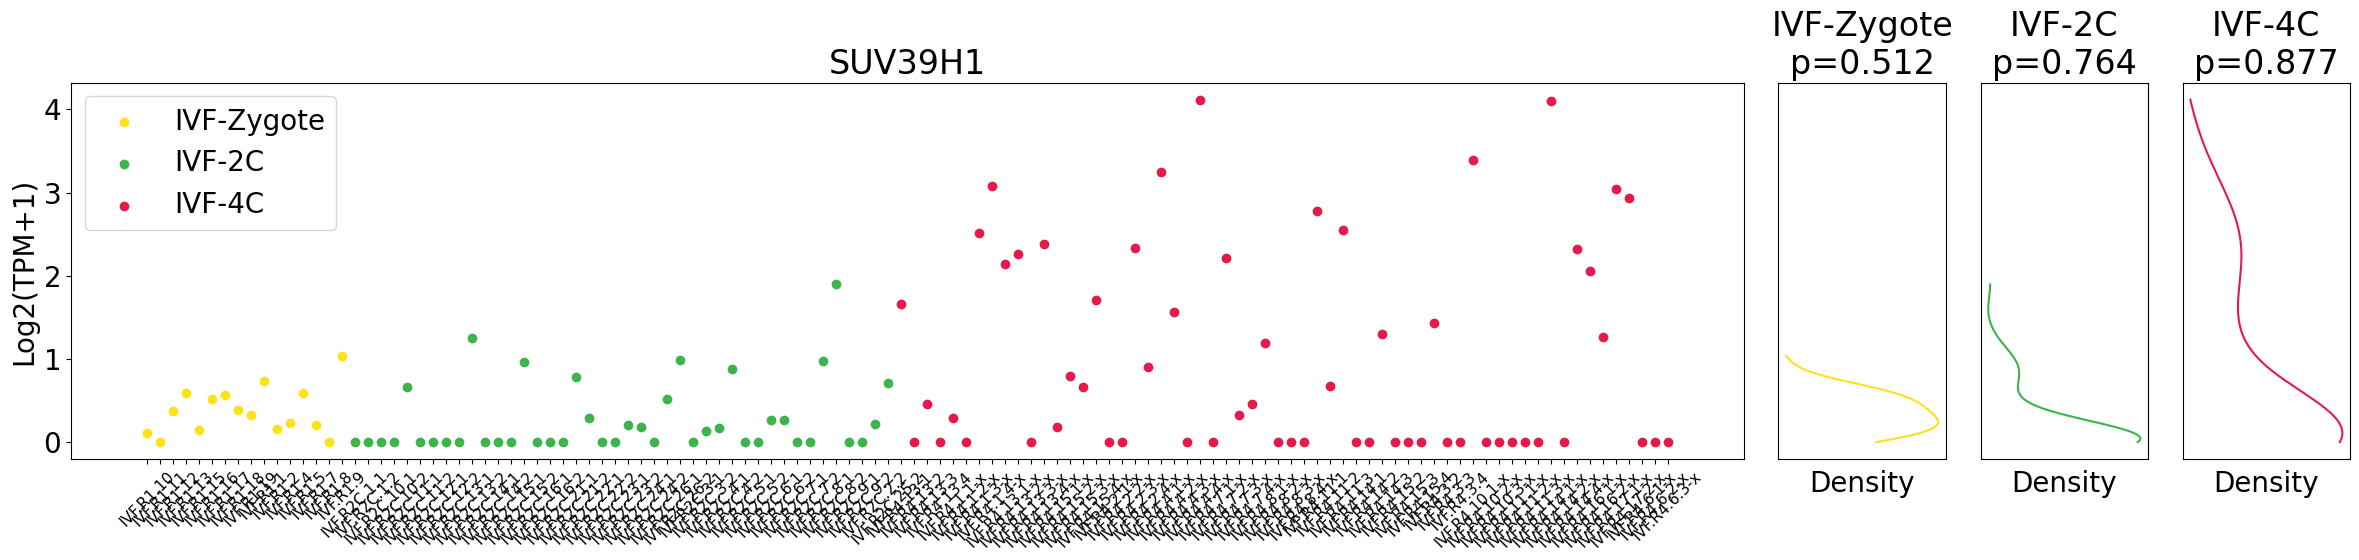

In [85]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import diptest
from scipy.stats import gaussian_kde
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 读取表达矩阵文件
with open('IVF_all_sort_log2TPM_genename.txt', 'r') as file:
    lines = file.readlines()

# 获取细胞名
cell_names = lines[0].strip().split('\t')[1:]

# 存储基因表达数据
gene_data = {}
for line in lines[1:]:
    parts = line.strip().split('\t')
    gene_id = parts[0]
    expression_data = list(map(float, parts[1:]))
    gene_data[gene_id] = expression_data

# 选择目标基因
gene_id = "SUV39H1"
expression_data = gene_data[gene_id]

# 提取各阶段索引和数据
mii_indices = [i for i, name in enumerate(cell_names) if name.startswith('IVF.R1')]
c2_indices  = [i for i, name in enumerate(cell_names) if name.startswith('IVF.R2C')]
c4_indices  = [i for i, name in enumerate(cell_names) if name.startswith('IVF.R4')]

mii_expression = np.array([expression_data[i] for i in mii_indices])
c2_expression  = np.array([expression_data[i] for i in c2_indices])
c4_expression  = np.array([expression_data[i] for i in c4_indices])

# 创建图形和子图
fig = plt.figure(figsize=(24, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[10, 1, 1, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

# 散点图
ax1.scatter([cell_names[i] for i in mii_indices], mii_expression, color='#ffe119', label='IVF-Zygote')
ax1.scatter([cell_names[i] for i in c2_indices], c2_expression, color='#3cb44b', label='IVF-2C')
ax1.scatter([cell_names[i] for i in c4_indices], c4_expression, color='#e6194b', label='IVF-4C')
ax1.set_title(gene_id)
ax1.set_ylabel('Log2(TPM+1)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# 添加虚线
#for x in [15.5,17.5,19.5,21.5,23.5,25.5,27.5,29.5,31.5,33.5,35.5,
#          37.5,39.5,41.5,43.5,45.5,47.5,49.5,51.5,53.5,55.5,
#          59.5,63.5,67.5,71.5,75.5,79.5,83.5]:
#    ax1.axvline(x=x, color='black', linestyle='--')

# 密度图函数
def plot_density(ax, data, color, label):
    kde = gaussian_kde(data)
    y_vals = np.linspace(min(data), max(data), 500)
    x_vals = kde(y_vals)
    ax.plot(x_vals, y_vals, color=color)
    ax.set_ylim(ax1.get_ylim())
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Density')
    ax.grid(True)
    p = diptest.diptest(data)[1]
    ax.set_title(f'{label}\np={p:.3f}')

# 绘制密度图
plot_density(ax2, mii_expression, '#ffe119', 'IVF-Zygote')
plot_density(ax3, c2_expression, '#3cb44b', 'IVF-2C')
plot_density(ax4, c4_expression, '#e6194b', 'IVF-4C')

# 调整字体
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)

plt.tight_layout()
# 保存图像为 PDF
#plt.savefig('IVF_GATA6_expression.svg', dpi=300, bbox_inches='tight', transparent=True)


/tmp/ipykernel_529239/1552297009.py:90: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(11)


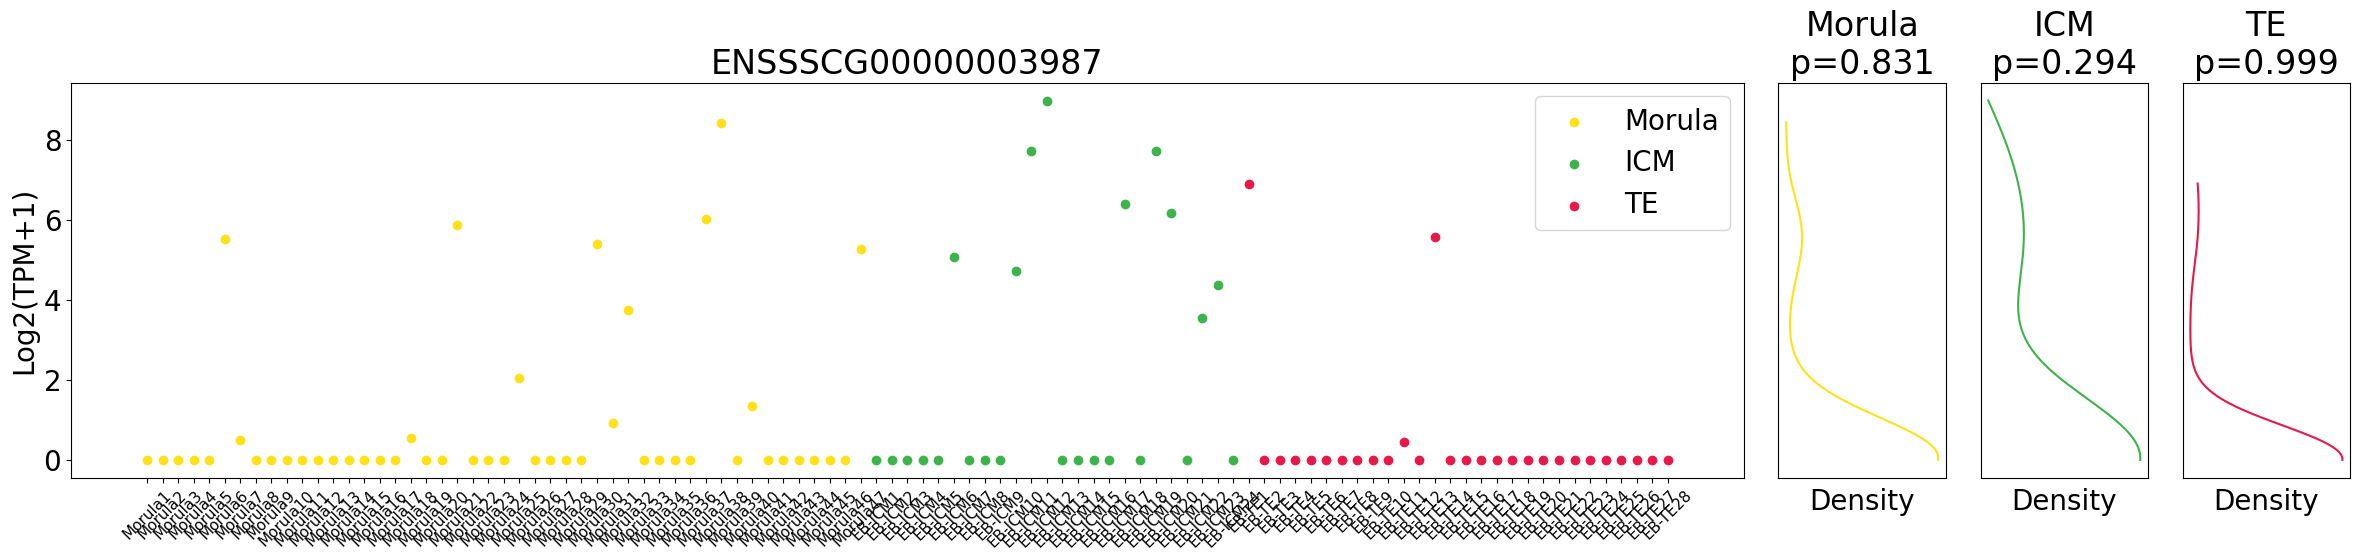

In [21]:
#可视化 Pluripotency and X chromosome dynamics revealed in pig pre-gastrulating embryos by single cell analysis
#in vivo pig embryos

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import diptest
from scipy.stats import gaussian_kde
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 读取表达矩阵文件
with open('GSE112380_Pig_log2TPMs_morula_ICM_TE.txt', 'r') as file:
    lines = file.readlines()

# 获取细胞名
cell_names = lines[0].strip().split('\t')[1:]

# 存储基因表达数据
gene_data = {}
for line in lines[1:]:
    parts = line.strip().split('\t')
    gene_id = parts[0]
    expression_data = list(map(float, parts[1:]))
    gene_data[gene_id] = expression_data

# 选择目标基因
gene_id = "ENSSSCG00000003987"
expression_data = gene_data[gene_id]

# 提取各阶段索引和数据
mii_indices = [i for i, name in enumerate(cell_names) if name.startswith('Morula')]
c2_indices  = [i for i, name in enumerate(cell_names) if name.startswith('EB-ICM')]
c4_indices  = [i for i, name in enumerate(cell_names) if name.startswith('EB-TE')]

mii_expression = np.array([expression_data[i] for i in mii_indices])
c2_expression  = np.array([expression_data[i] for i in c2_indices])
c4_expression  = np.array([expression_data[i] for i in c4_indices])

# 创建图形和子图
fig = plt.figure(figsize=(24, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[10, 1, 1, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

# 散点图
ax1.scatter([cell_names[i] for i in mii_indices], mii_expression, color='#ffe119', label='Morula')
ax1.scatter([cell_names[i] for i in c2_indices], c2_expression, color='#3cb44b', label='ICM')
ax1.scatter([cell_names[i] for i in c4_indices], c4_expression, color='#e6194b', label='TE')
ax1.set_title(gene_id)
ax1.set_ylabel('Log2(TPM+1)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

## 添加虚线
#for x in [15.5,17.5,19.5,21.5,23.5,25.5,27.5,29.5,31.5,33.5,35.5,
#          37.5,39.5,41.5,43.5,45.5,47.5,49.5,51.5,53.5,55.5,
#          59.5,63.5,67.5,71.5,75.5,79.5,83.5]:
#    #ax1.axvline(x=x, color='black', linestyle='--')

# 密度图函数
def plot_density(ax, data, color, label):
    kde = gaussian_kde(data)
    y_vals = np.linspace(min(data), max(data), 500)
    x_vals = kde(y_vals)
    ax.plot(x_vals, y_vals, color=color)
    ax.set_ylim(ax1.get_ylim())
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Density')
    ax.grid(True)
    p = diptest.diptest(data)[1]
    ax.set_title(f'{label}\np={p:.3f}')

# 绘制密度图
plot_density(ax2, mii_expression, '#ffe119', 'Morula')
plot_density(ax3, c2_expression, '#3cb44b', 'ICM')
plot_density(ax4, c4_expression, '#e6194b', 'TE')

# 调整字体
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)

plt.tight_layout()
# 保存图像为 PDF
#plt.savefig('IVF_GATA6_expression.svg', dpi=300, bbox_inches='tight', transparent=True)


/tmp/ipykernel_2775208/2701067347.py:132: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(11)


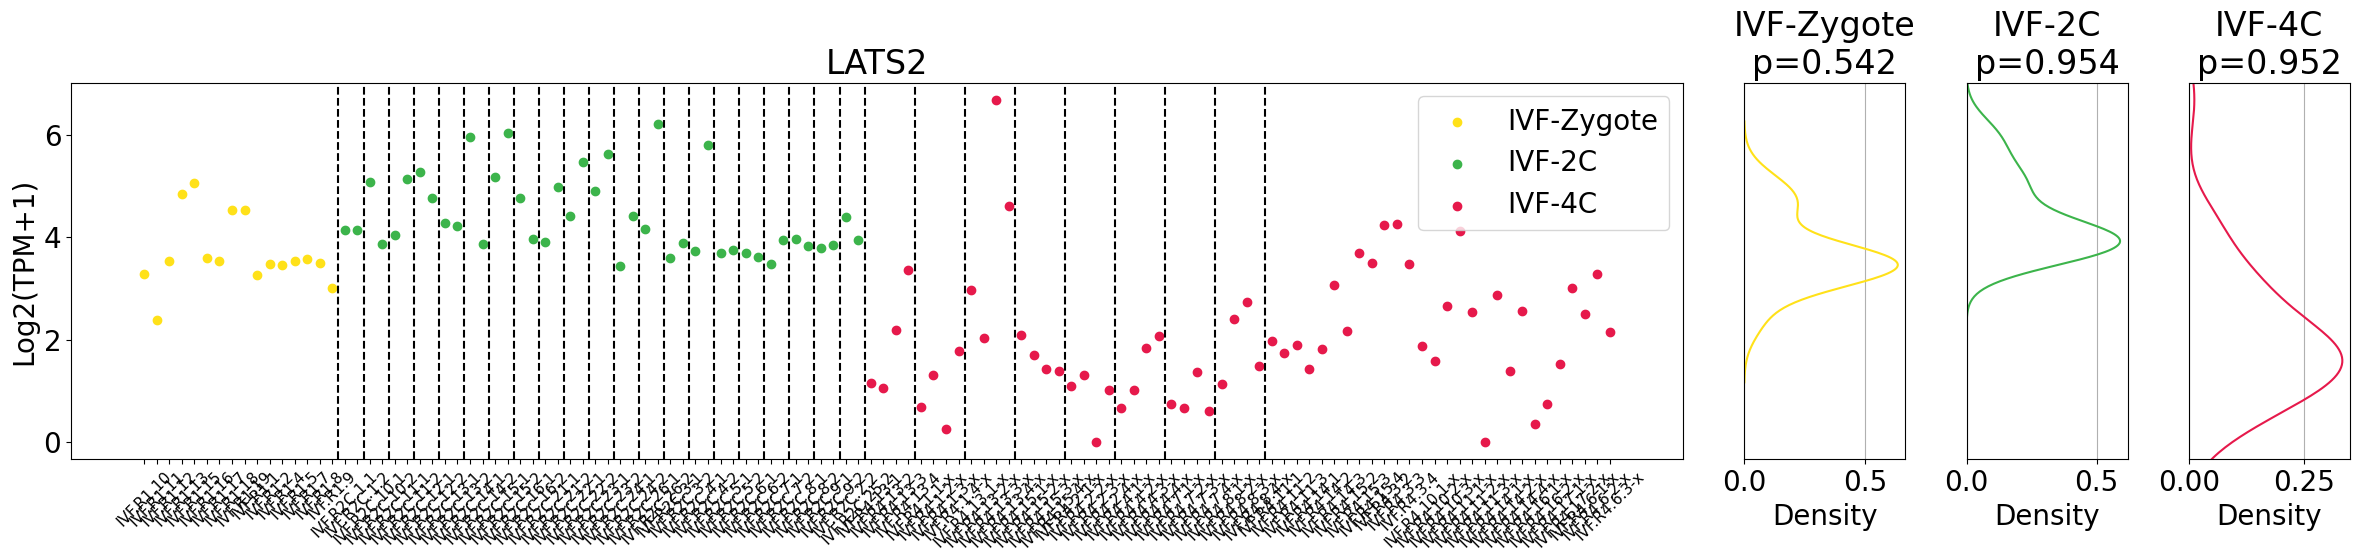

In [94]:
#IVF 所有胚胎表达量可视化
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import diptest
import numpy as np  # Import NumPy

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 打开文件并读取内容
with open('IVF_all_sort_log2TPM_genename.txt', 'r') as file:
    lines = file.readlines()

# 解析第一行，提取细胞名称
cell_names = lines[0].strip().split('\t')[1:]

# 初始化一个空字典来存储数据
gene_data = {}

# 解析文件内容，存储基因数据
for line in lines[1:]:
    parts = line.strip().split('\t')
    gene_id = parts[0]
    expression_data = list(map(float, parts[1:]))
    gene_data[gene_id] = expression_data

# 指定要绘制散点图的基因名
gene_id = "LATS2"

# 获取指定基因的表达数据
expression_data = gene_data[gene_id]

# 生成 x 轴数据，这里是细胞名称
x_values = cell_names

# 选取 MII 细胞的索引
mii_indices = [i for i, cell_name in enumerate(cell_names) if cell_name.startswith('IVF.R1')]
c2_indices = [i for i, cell_name in enumerate(cell_names) if cell_name.startswith('IVF.R2C')]
c4_indices = [i for i, cell_name in enumerate(cell_names) if cell_name.startswith('IVF.R4')]
# 选取 MII 细胞的表达数据
mii_expression_data = [expression_data[i] for i in mii_indices]
c2_expression_data = [expression_data[i] for i in c2_indices]
c4_expression_data = [expression_data[i] for i in c4_indices]

# 创建一个带有两个子图的图形
fig = plt.figure(figsize=(24, 6))  # 增大图形宽度以增大每列数据的间距
gs = gridspec.GridSpec(1, 4, width_ratios=[10, 1, 1, 1])  # 调整第一个子图的宽度

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

# 绘制 MII 细胞的散点图
ax1.scatter([x_values[i] for i in mii_indices], mii_expression_data, color='#ffe119', label='IVF-Zygote')
ax1.scatter([x_values[i] for i in c2_indices], c2_expression_data, color='#3cb44b', label='IVF-2C')
ax1.scatter([x_values[i] for i in c4_indices], c4_expression_data, color='#e6194b', label='IVF-4C')
ax1.set_title(gene_id)
ax1.set_xlabel('')  
ax1.set_ylabel('Log2(TPM+1)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

ax1.axvline(x=15.5, color='black', linestyle='--')
ax1.axvline(x=17.5, color='black', linestyle='--')
ax1.axvline(x=19.5, color='black', linestyle='--')
ax1.axvline(x=21.5, color='black', linestyle='--')
ax1.axvline(x=23.5, color='black', linestyle='--')
ax1.axvline(x=25.5, color='black', linestyle='--')
ax1.axvline(x=27.5, color='black', linestyle='--')
ax1.axvline(x=29.5, color='black', linestyle='--')
ax1.axvline(x=31.5, color='black', linestyle='--')
ax1.axvline(x=33.5, color='black', linestyle='--')
ax1.axvline(x=35.5, color='black', linestyle='--')
ax1.axvline(x=37.5, color='black', linestyle='--')
ax1.axvline(x=39.5, color='black', linestyle='--')
ax1.axvline(x=41.5, color='black', linestyle='--')
ax1.axvline(x=43.5, color='black', linestyle='--')
ax1.axvline(x=45.5, color='black', linestyle='--')
ax1.axvline(x=47.5, color='black', linestyle='--')
ax1.axvline(x=49.5, color='black', linestyle='--')
ax1.axvline(x=51.5, color='black', linestyle='--')
ax1.axvline(x=53.5, color='black', linestyle='--')
ax1.axvline(x=55.5, color='black', linestyle='--')

ax1.axvline(x=57.5, color='black', linestyle='--')
ax1.axvline(x=61.5, color='black', linestyle='--')
ax1.axvline(x=65.5, color='black', linestyle='--')
ax1.axvline(x=69.5, color='black', linestyle='--')
ax1.axvline(x=73.5, color='black', linestyle='--')
ax1.axvline(x=77.5, color='black', linestyle='--')
ax1.axvline(x=81.5, color='black', linestyle='--')
ax1.axvline(x=85.5, color='black', linestyle='--')
ax1.axvline(x=89.5, color='black', linestyle='--')

# 绘制 MII 细胞的密度曲线分布图
sns.kdeplot(y=mii_expression_data, color='#ffe119', vertical=False, ax=ax2)
mii_expression_data = np.array(mii_expression_data)
p_value_mii = diptest.diptest(mii_expression_data)[1]
ax2.set_title(f'IVF-Zygote\np={p_value_mii:.3f}')
ax2.set_xlabel('Density')
ax2.set_ylabel('')
ax2.set_ylim(ax1.get_ylim())  # 设置纵坐标轴范围与第一个子图一致
ax2.grid(True)
ax2.set_yticks([])  # 隐藏 y 轴刻度和标签

# 绘制 2C 细胞的密度曲线分布图
sns.kdeplot(y=c2_expression_data, color='#3cb44b', vertical=False, ax=ax3)
c2_expression_data = np.array(c2_expression_data)
p_value_c2 = diptest.diptest(c2_expression_data)[1]
ax3.set_title(f'IVF-2C\np={p_value_c2:.3f}')
ax3.set_xlabel('Density')
ax3.set_ylabel('')
ax3.set_ylim(ax1.get_ylim())  # 设置纵坐标轴范围与第一个子图一致
ax3.grid(True)
ax3.set_yticks([])  # 隐藏 y 轴刻度和标签

# 绘制 4C 细胞的密度曲线分布图
sns.kdeplot(y=c4_expression_data, color='#e6194b', vertical=False, ax=ax4)
c4_expression_data = np.array(c4_expression_data)
p_value_c4 = diptest.diptest(c4_expression_data)[1]
ax4.set_title(f'IVF-4C\np={p_value_c4:.3f}')
ax4.set_xlabel('Density')
ax4.set_ylabel('')
ax4.set_ylim(ax1.get_ylim())  # 设置纵坐标轴范围与第一个子图一致
ax4.grid(True)
ax4.set_yticks([])  # 隐藏 y 轴刻度和标签

# 单独设置子图1的x轴标签字体大小为12
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    
plt.tight_layout()
plt.show()
